<a href="https://colab.research.google.com/github/BalkeesRekik/DS3001/blob/main/wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

#Q1

#1
airbnb_df = pd.read_csv("/content/airbnb_hw.csv")

# Cleaning 'Price' column: Remove commas and convert to float
airbnb_df['Price'] = airbnb_df['Price'].astype(str).str.replace(',', '').astype(float)

# Count missing values after conversion
missing_price_count = airbnb_df['Price'].isna().sum()

# Display summary statistics and missing values count
print("Price Column Summary:")
print(airbnb_df['Price'].describe())
print(f"Missing values in Price column: {missing_price_count}")

#2
mn_police_df = pd.read_csv("/content/mn_police_use_of_force.csv")

# Calculate proportion of missing values in 'subject_injury' before cleaning
missing_subject_injury_ratio = mn_police_df['subject_injury'].isna().mean()

# Replace missing values with "No" and standardize existing values to "Yes"
mn_police_df['subject_injury'] = mn_police_df['subject_injury'].notna().map({True: "Yes", False: "No"})

# Cross-tabulate the cleaned 'subject_injury' variable with 'force_type'
force_type_crosstab = pd.crosstab(mn_police_df['subject_injury'], mn_police_df['force_type'])

# Display results
print(f"Proportion of missing values in subject_injury before cleaning: {missing_subject_injury_ratio:.2%}")
print("\nCross-tabulation of subject_injury and force_type:")
print(force_type_crosstab)

#3

file_path = "/content/pretrial_data.csv"
pretrial_df = pd.read_csv(file_path)

# Clean 'released' variable (formerly 'WhetherDefendantWasReleasedPretrial')
pretrial_df['released'] = pretrial_df['released'].astype(str).str.strip().str.capitalize()

# Replace variations of "yes" and "no" with standard values (if applicable)
pretrial_df['released'] = pretrial_df['released'].replace(
    {'Yes': 'Yes', 'No': 'No', 'Y': 'Yes', 'N': 'No'}
)

# Replace missing values with NaN
pretrial_df['released'] = pretrial_df['released'].replace('', np.nan)

# Count missing values after cleaning
missing_release_count = pretrial_df['released'].isna().sum()

# Display results
print(f"Missing values in 'released' after cleaning: {missing_release_count}")
print(pretrial_df['released'].value_counts(dropna=False))

# 4

# Use 'sentence_type' (formerly 'SentenceTypeAllChargesAtConvictionInContactEvent') to guide cleaning
print(pretrial_df['sentence_type'].value_counts(dropna=False))

# Strip whitespace from 'sentence' values
pretrial_df['sentence'] = pretrial_df['sentence'].astype(str).str.strip()

# If 'sentence_type' is "Dismissed" or "Not Guilty," set 'sentence' to NaN
pretrial_df.loc[pretrial_df['sentence_type'].isin(["Dismissed", "Not Guilty"]), 'sentence'] = np.nan

# Convert 'sentence' values to a numeric format where applicable
pretrial_df['sentence'] = pd.to_numeric(pretrial_df['sentence'], errors='coerce')

# Display cleaned column summary
print(pretrial_df['sentence'].describe())


Price Column Summary:
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64
Missing values in Price column: 0
Proportion of missing values in subject_injury before cleaning: 76.19%

Cross-tabulation of subject_injury and force_type:
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          7051               1421        0   
Yes                 2          2379                172        2   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             27                 74           87   
Yes                            77                 74            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \


<ipython-input-4-4c185479a02e>:7: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  shark_attack_df = pd.read_csv("/content/GSAF5.csv", encoding='latin1')
<ipython-input-4-4c185479a02e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attack_df_cleaned['Year'] = shark_attack_df_cleaned['Year'].astype(int)


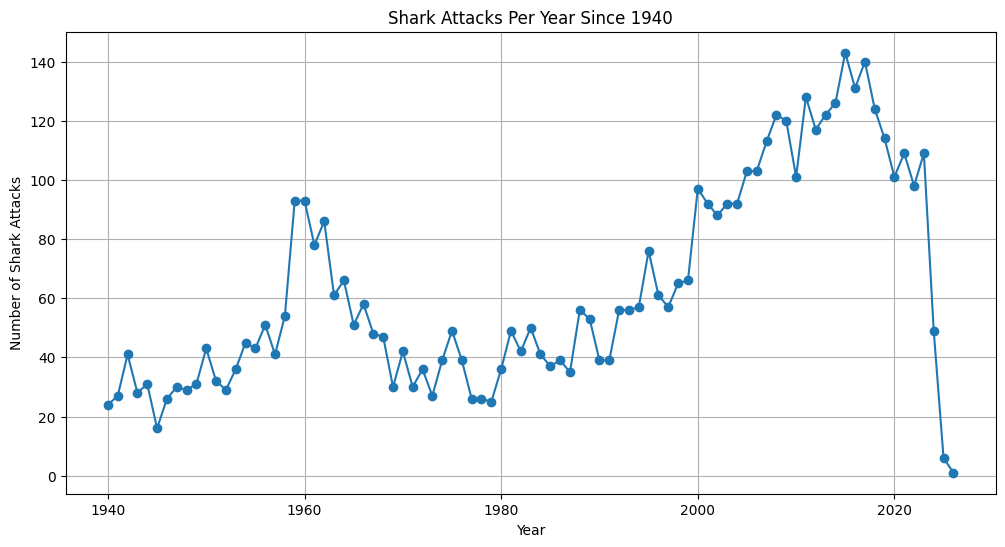

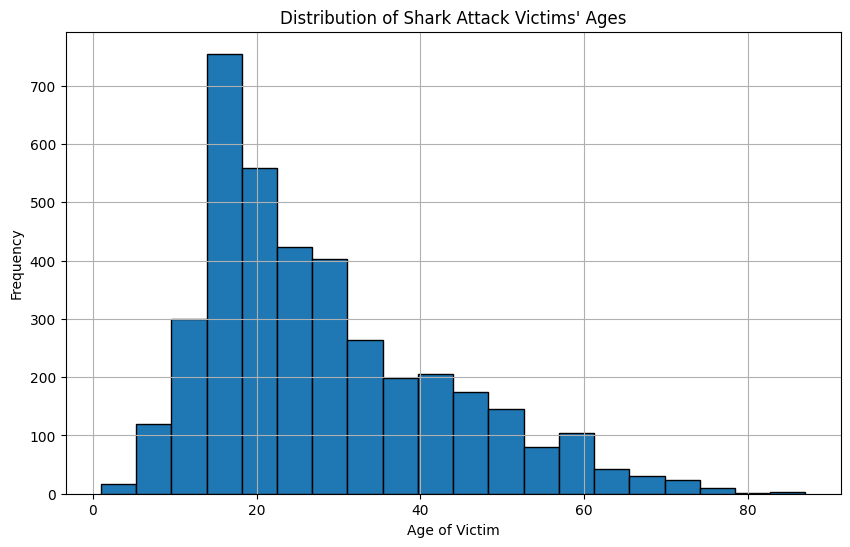

Proportion of Male Victims:
 Sex
M      85.262608
F      14.711262
LLI     0.026130
Name: proportion, dtype: float64

Proportion of Attack Types:
 Type
Unprovoked    83.212435
Unknown        8.834197
Provoked       7.953368
Name: proportion, dtype: float64

Fatality Proportions:
 Fatal Y/N
N          76.476684
Y          17.279793
Unknown     6.243523
Name: proportion, dtype: float64

Unprovoked Attacks by Gender:
 Sex
M      84.608150
F      15.360502
LLI     0.031348
Name: proportion, dtype: float64

Fatality Rate by Attack Type:
 Fatal Y/N           N    Unknown          Y
Type                                       
Provoked    96.091205   0.977199   2.931596
Unknown     26.392962  64.222874   9.384164
Unprovoked  79.919054   0.591532  19.489415

Fatality Rate by Gender:
 Fatal Y/N           N   Unknown          Y
Sex                                       
F           79.218472  6.749556  14.031972
LLI        100.000000  0.000000   0.000000
M           76.126264  6.098682  17.775054

In [4]:
# Q2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
shark_attack_df = pd.read_csv("/content/GSAF5.csv", encoding='latin1')

# Drop empty columns
shark_attack_df_cleaned = shark_attack_df.dropna(axis=1, how="all")

# Rename columns to remove trailing spaces
shark_attack_df_cleaned = shark_attack_df_cleaned.rename(columns=lambda x: x.strip())

# Clean 'Year' column
shark_attack_df_cleaned = shark_attack_df_cleaned.dropna(subset=['Year'])
shark_attack_df_cleaned['Year'] = shark_attack_df_cleaned['Year'].astype(int)

# Filter for attacks since 1940
shark_attacks_since_1940 = shark_attack_df_cleaned[shark_attack_df_cleaned['Year'] >= 1940]

# Count attacks per year
attacks_per_year = shark_attacks_since_1940['Year'].value_counts().sort_index()

# Plot attacks per year
plt.figure(figsize=(12, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attacks Per Year Since 1940")
plt.grid(True)
plt.show()

# Clean 'Age' column and convert to numeric
shark_attack_df_cleaned['Age'] = pd.to_numeric(shark_attack_df_cleaned['Age'], errors='coerce')
shark_attack_df_cleaned = shark_attack_df_cleaned.dropna(subset=['Age'])

# Plot histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(shark_attack_df_cleaned['Age'], bins=20, edgecolor='black')
plt.xlabel("Age of Victim")
plt.ylabel("Frequency")
plt.title("Distribution of Shark Attack Victims' Ages")
plt.grid(True)
plt.show()

# Clean 'Sex' column and calculate proportions
shark_attack_df_cleaned['Sex'] = shark_attack_df_cleaned['Sex'].str.strip().str.upper()
sex_counts = shark_attack_df_cleaned['Sex'].value_counts(normalize=True) * 100
print("Proportion of Male Victims:\n", sex_counts)

# Clean 'Type' column to keep only "Provoked", "Unprovoked", "Unknown"
shark_attack_df_cleaned['Type'] = shark_attack_df_cleaned['Type'].str.strip().str.capitalize()
valid_types = ["Provoked", "Unprovoked"]
shark_attack_df_cleaned['Type'] = shark_attack_df_cleaned['Type'].apply(lambda x: x if x in valid_types else "Unknown")
type_proportions = shark_attack_df_cleaned['Type'].value_counts(normalize=True) * 100
print("\nProportion of Attack Types:\n", type_proportions)

# Clean 'Fatal Y/N' column
shark_attack_df_cleaned['Fatal Y/N'] = shark_attack_df_cleaned['Fatal Y/N'].str.strip().str.upper()
valid_fatal_values = ["Y", "N"]
shark_attack_df_cleaned['Fatal Y/N'] = shark_attack_df_cleaned['Fatal Y/N'].apply(lambda x: x if x in valid_fatal_values else "Unknown")
fatal_proportions = shark_attack_df_cleaned['Fatal Y/N'].value_counts(normalize=True) * 100
print("\nFatality Proportions:\n", fatal_proportions)

# Analyze unprovoked attacks by gender
unprovoked_by_gender = shark_attack_df_cleaned[shark_attack_df_cleaned['Type'] == "Unprovoked"]['Sex'].value_counts(normalize=True) * 100
print("\nUnprovoked Attacks by Gender:\n", unprovoked_by_gender)

# Compare fatality rates for provoked vs. unprovoked attacks
fatality_by_type = pd.crosstab(shark_attack_df_cleaned['Type'], shark_attack_df_cleaned['Fatal Y/N'], normalize='index') * 100
print("\nFatality Rate by Attack Type:\n", fatality_by_type)

# Compare fatality rates by gender
fatality_by_gender = pd.crosstab(shark_attack_df_cleaned['Sex'], shark_attack_df_cleaned['Fatal Y/N'], normalize='index') * 100
print("\nFatality Rate by Gender:\n", fatality_by_gender)

# Analyze white shark attacks
shark_attack_df_cleaned['Species'] = shark_attack_df_cleaned['Species'].str.lower()
white_shark_attacks = shark_attack_df_cleaned['Species'].str.contains("white shark", na=False).sum()
white_shark_proportion = (white_shark_attacks / len(shark_attack_df_cleaned)) * 100
print(f"\nProportion of White Shark Attacks: {white_shark_proportion:.2f}%")
